# Para Saber Mais

## 1 - exportando a visualização
A exportação de tabelas em diferentes formatos é uma tarefa muito comum e importante na análise de dados e na produção de relatórios. O Pandas oferece diversas funções para exportar um objeto Styler para diferentes tipos de arquivos.

Podemos exportar um objeto Styler para diferentes formatos, como HTML, Excel e LaTeX, a partir das seguintes funções:
- `to_html()`: essa função permite exportar uma tabela formatada em HTML. A função recebe vários parâmetros para personalizar a formatação do arquivo HTML, como o título da página, as bordas da tabela, o estilo CSS e o encoding.
- `to_excel()`: essa função permite exportar uma tabela para um arquivo Excel. É possível personalizar a planilha de destino, as opções de formatação, os nomes das abas e outras configurações.
- `to_latex()`: essa função permite exportar uma tabela para um arquivo LaTeX. É possível personalizar o estilo de formatação, as opções de posicionamento, as configurações de largura e outras opções.

Vamos transformar o DataFrame que lista os gêneros de filmes mais bem avaliados em:
- um arquivo HTML;
- um arquivo Excel;
- e um arquivo LaTeX.

In [ ]:
import pandas as pd

# DataFrame com filmes bem avaliados
dados = {
    'Gênero': ['Drama', 'Comédia', 'Ação', 'Ficção Científica', 'Terror'],
    'Nota Média': [4.5, 4.3, 4.2, 4.1, 3.8],
    'Quantidade de Avaliações': [1500, 1200, 1000, 800, 600]
}

df_filmes = pd.DataFrame(dados)

# Adiciona um rank de popularidade baseado no valor das avaliações
df_filmes['Rank'] = df_filmes['Quantidade de Avaliações'].rank(method='dense', ascending=False).astype(int)

# Define a coluna 'Rank' como índice do DataFrame
df_filmes.set_index('Rank', inplace=True)
# Objeto style
s_filme = df_filmes.style

# Criar um arquivo HTML
s_filme.to_html('estilo_html.html', index = False)

# Criar um arquivo Excel
s_filme.to_excel('estilo_xlsx.xlsx', engine='openpyxl')

# Criar um arquivo LaTeX
with open('estilo_latex.tex', 'w') as f:
  f.write(s_filme.to_latex())

É importante destacar que, para outros formatos, é necessário que o objeto Styler seja convertido para um objeto DataFrame.

## 2 -  aplicando cores
Temos várias opções de estilização que envolvem o uso de diversas cores. Mesmo com todas essas opções, não podemos utilizá-las de qualquer modo. É preciso saber escolher as cores para serem utilizadas em uma visualização. Uma técnica que facilita bastante a escolha das cores para a visualização é a de associar as cores a um **storytelling**.

Storytelling com cores pode ser usado para contar uma história ou transmitir uma mensagem através do uso de cores em uma visualização de dados. As cores são uma ferramenta poderosa para atrair a atenção do espectador e enfatizar informações importantes. No entanto, é importante escolher as cores certas para garantir que a mensagem seja transmitida com clareza.

Uma boa prática é escolher um esquema de cores que seja **consistente e significativo**. Por exemplo, para indicar alerta ou perigo, pode-se usar cores quentes como vermelho, laranja e amarelo, enquanto azul e verde são cores frequentemente usadas para representar tranquilidade e calma. É importante também considerar o público-alvo da visualização e escolher um esquema de cores que seja apropriado para eles.

Outra técnica útil é usar cores para destacar informações importantes. Por exemplo, pode-se usar uma cor diferente para destacar uma coluna ou célula que contenha valores extremos, como a maior ou a menor nota média. Isso ajuda o espectador a se concentrar nas informações mais relevantes. Essa preocupação com a legibilidade e compreensão dos dados por parte do público que será informado pela visualização se associa a outro ponto importante na aplicação dessa técnica: **evitar o uso excessivo de cores na visualização**. Muitas cores podem distrair o espectador e dificultar a compreensão das informações. Em vez disso, é possível limitar o uso de cores a elementos importantes da visualização.

Vale ressaltar que nem todos os tons de cores são tolerantes aos olhos, alguns podem trazer incômodo a quem observa. Podemos trabalhar com um conjunto de código de cores que se caracteriza por não incomodar a pessoa que a observa. Alguns exemplos dessas cores estão listados abaixo.

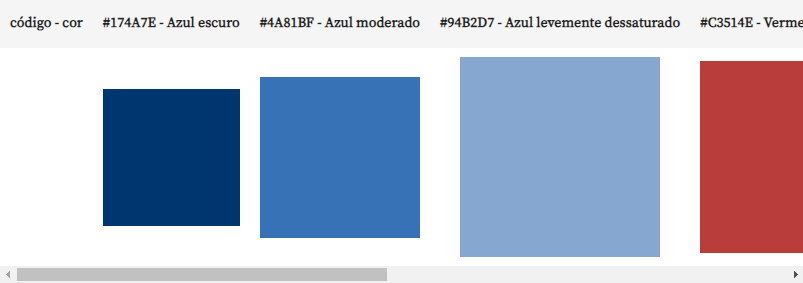

## 3 - funções built-in do Styler
Além das funções `highlight_max`, `highlight_min`, `background_gradient` e `bar` que conhecemos durante as aulas, existem outros estilos integrados ao Styler que podemos aplicar na tabela.

As funções built-in permitem aplicar estilizações comuns na nossa visualização, sem a necessidade de se construir um código específico para aplicá-las na tabela. Vamos conhecer essas funções abaixo.
- `highlight_null`: identifica e destaca elementos faltantes (valores nulos).
- `highlight_between`: identifica e destaca elementos que estão dentro de uma faixa específica de valores.
- `highlight_quantile`: identifica e destaca elementos de acordo com a faixa de quantil especificada.
- `text_gradient`: funciona de forma similar ao `background_gradient`, criando um gradiente no texto baseado na escala numérica dos valores presentes na coluna a ser transformada ou em outra.

Para exemplificar, vamos construir um código com `highlight_null` e `highlight_between`. Iremos utilizar uma tabela com dados salariais de 5 funcionários de uma empresa.

O código do DataFrame utilizado está dado abaixo para que você consiga aplicar o exemplo:

In [8]:
import pandas as pd
import numpy as np

dados = pd.DataFrame({'ID': [1204, 3018, 9963, 1005, 5627],
                   'Idade': [np.nan, 32, 19, np.nan, 38],
                   'Salário': [3500.00, 4200.50, 2800.00, 5700.25, 4900.75]})

O `highlight_null` será aplicado no objeto Styler, e a cor de fundo dos elemento que tem dados nulos é alterada para laranja (`#F79747`).

In [ ]:
s_nan = dados.style.format({'Idade':'{:.0f}','Salário':'{:,.2f}'})\
                   .highlight_null(color='#F79747')
s_nan

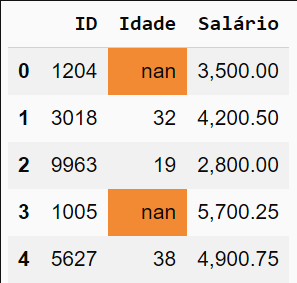

Para o `highlight_between`, podemos definir um limite superior e inferior para destacar um valor que esteja entre esses limites. No exemplo, o objetivo é destacar os valores na coluna Salário que estão entre 4 e 5 mil. O parâmetro `left` representa o limite inferior e o `right` o limite superior dos valores.

In [10]:
## Definir os limites superior e inferior
limite_superior = 5000.0
# O limite inferior é especificado através de uma Series que informa qual a coluna que terá a aplicação da função
limite_inferior = pd.Series([4000.0], index=['Salário'])

## Aplicar a estilização com highlight_between
s_bet = dados.style.format({'Idade':'{:.0f}','Salário':'{:,.2f}'})\
                   .highlight_between(left=limite_inferior, right=limite_superior,
                                      axis=1, color='#94B2D7')
s_bet

,ID,Idade,Salário
0,1204,nan,"3,500.00"
1,3018,32,"4,200.50"
2,9963,19,"2,800.00"
3,1005,nan,"5,700.25"
4,5627,38,"4,900.75"


Caso você queira utilizar os outros métodos, você pode consultar a documentação para entender como aplicá-los.

## 4 - pivot_table é igual a pivot?
O Pandas fornece dois métodos que permitem transformar um DataFrame em outro formato, geralmente para fins de análise e visualização de dados, são eles o [`pivot_table`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) e o [`pivot`](https://pandas.pydata.org/docs/reference/api/pandas.pivot.html). A principal diferença entre os dois métodos está na maneira como os dados são agregados.

O método `pivot_table` permite transformar os dados com uma função de agregação para que sejam gerados resumos estatísticos, como a média, a soma, a contagem, etc. Por outro lado, o `pivot` apenas transforma um DataFrame sem uma função de agregação incluída, podendo ser comparado a uma transformação de formatos.

De modo geral, o `pivot_table` é mais útil quando você tem dados que precisam ser agregados de alguma forma antes de serem transformados. Ele permite especificar quais colunas devem ser usadas para agrupar os dados e quais colunas devem ser agregadas. Já o `pivot` é bastante usado para transformar dados de uma coluna em várias colunas.

Para um entendimento mais aprofundado podemos fazer um exemplo. Suponhamos que temos o seguinte conjunto de dados com informações sobre vendas de produtos em diferentes regiões:

In [1]:
## Código para acompanhamento do exemplo

import pandas as pd

df = pd.DataFrame({
    'Região': ['Norte', 'Norte', 'Norte', 'Norte', 'Sul', 'Sul', 'Sul', 'Sul'],
    'Produto': ['Produto A', 'Produto B', 'Produto A', 'Produto B', 'Produto A', 'Produto B', 'Produto A', 'Produto B'],
    'Vendas': [100, 50, 150, 200, 70, 120, 110, 80],
    'Data': ['01/2022', '01/2022', '02/2022', '02/2022', '01/2022', '01/2022', '02/2022', '02/2022']
})

Com o método pivot_table, podemos calcular a média de vendas de cada produto em cada região:

In [2]:
df.pivot_table(values='Vendas', index='Região', columns='Produto', aggfunc='mean')

Produto,Produto A,Produto B
Região,,
Norte,125,125
Sul,90,100


Já com o método pivot, podemos reorganizar os dados para que cada coluna seja uma combinação de Região, Produto e Data:

In [3]:
df.pivot(index=['Região', 'Produto'], columns='Data', values='Vendas')

Data              01/2022  02/2022
Região Produto                    
Norte  Produto A      100      150
       Produto B       50      200
Sul    Produto A       70      110
       Produto B      120       80

Com isso, é possível notar que o `pivot_table` agregou os valores para cada combinação de Região e Produto, enquanto o `pivot` criou colunas separadas para cada combinação de Região, Produto e Data.

## 5 - tabelas formais
As tabelas descritas como “formais” são também conhecidas como tabelas acadêmicas ou tabelas científicas. Essas tabelas são uma importante ferramenta de comunicação na apresentação de dados, pois são construídas para apresentar dados numéricos e/ou qualitativos de forma clara e concisa para auxiliar a pessoa leitora na compreensão dos resultados.

Durante o curso, será feita uma simplificação na estrutura da tabela formal, apenas alterando o layout de apresentação. No entanto, essas tabelas exigem uma atenção maior a sua construção, pois seguem algumas regras básicas de formatação, como a inclusão de um título descritivo, a definição das unidades de medida utilizadas, a formatação das células de dados e a inclusão de notas explicativas, quando necessário. Podemos seguir algumas dicas para a construção de tabelas científicas:
- **Manter a simplicidade**: as tabelas devem ser claras e fáceis de ler. Não inclua informações desnecessárias ou complicadas.
- **Título claro e conciso**: é preciso inserir um título na tabela, e ele deve ser claro e indicar claramente o conteúdo da tabela. Evite títulos genéricos, como "Dados" ou "Resultados".
- **Legenda completa**: inclua uma legenda que descreva todos os elementos da tabela, como abreviações, unidades de medida e símbolos.
- **Evitar células vazias**: se possível, sempre preencha células com informações relevantes.
- **Destaque dados importantes**: busque destacar os dados importantes dentro da tabela, com alterações do plano de fundo ou do texto para negrito.
- **Evite tabelas muito longas**: tabelas muito longas podem ser difíceis de ler e podem ser divididas em várias tabelas menores, se possível.

Lembrando que mesmo existindo um conjunto de dicas padrão para se seguir, a depender do local onde você enviar os dados, podem ter algumas regras específicas na montagem de tabelas. Então, busque ter cautela e se informar com quem irá receber esses dados sobre o formato esperado.

Um ótimo livro para estudar e se aprofundar nesse tema é o [Show Me the Numbers: Designing Tables and Graphs to Enlighten do Stephen Few](https://www.amazon.com/Show-Me-Numbers-Designing-Enlighten/dp/0970601972), um autor bastante reconhecido cientificamente por produções sobre Data Visualization.